<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 2  (Problem 2) - Character Generator Model (Individual)</h2><h3>AY2022/23 Semester</h3></th>
    </tr>
</table>

In [30]:
# Import the Required Packages
from tensorflow import keras
print('keras: ', keras.__version__)
import os

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import strings

from tensorflow.keras import utils, layers, losses, optimizers, callbacks, backend, regularizers, Sequential, Input
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.efficientnet import EfficientNetB0
from tensorflow.keras.models import Model
import tensorflow.keras.backend as K
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
import string
import re

keras:  2.9.0


## Step 1 – Data Loading and Processing

### 1.1 Data Loading

In [4]:
import numpy as np

# openning and reading the Harry_Potter_Book1.txt file
path = 'E:\\Keene\DL\Assignment 2\Harry_Potter_Book1_Original.txt'
text = open(path, 'r', encoding='utf-8').read().lower()
print('Corpus length:', len(text))
print(type(text))

Corpus length: 474429
<class 'str'>


In [5]:
# Checking the total number of characters in the original text

# Length of extracted character sequences
maxlen = 60

# We sample a new sequence every `step` characters
step = 3

# This holds our extracted sequences
sentences = []

# This holds the targets (the follow-up characters)
next_chars = []

for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
print('Number of sequences:', len(sentences))
print('sentences[0]: ',sentences[0])
print('next_chars[0]: ',next_chars[0])
print('\n')
print('sentences[1]: ',sentences[1])
print('next_chars[1]: ',next_chars[1])

Number of sequences: 158123
sentences[0]:  / 




the boy who lived 

mr. and mrs. dursley, of number f
next_chars[0]:  o


sentences[1]:  



the boy who lived 

mr. and mrs. dursley, of number four
next_chars[1]:  ,


In [6]:
# Original list of unique characters in the corpus
chars = sorted(list(set(text)))
print('Unique characters:', len(chars))
print(chars)
# Dictionary mapping unique characters to their index in `chars`
char_indices = dict((char, chars.index(char)) for char in chars)

Unique characters: 59
['\n', ' ', '!', '"', "'", '(', ')', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', '\\', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '|', '—', '‘', '’', '“', '”', '•', '■']


### 1.2 Data Processing


In [52]:
# openning and reading the Harry_Potter_Book1.txt file after cleaning
#path = 'C:\\Users\Keene Ng\Keene\School\Yr 2.1\DL\Assignment 2\Harry_Potter_Book1.txt'
path = 'E:\\Keene\DL\Assignment 2\Harry_Potter_Book1.txt'
text = open(path, 'r', encoding='utf-8').read().lower()
print('Corpus length:', len(text))
print(type(text))

Corpus length: 454523
<class 'str'>


In [53]:
# Checking the total number of characters in the text after cleaning
# Length of extracted character sequences
maxlen = 60

# We sample a new sequence every `step` characters
step = 3

# This holds our extracted sequences
sentences = []

# This holds the targets (the follow-up characters)
next_chars = []

for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
print('Number of sequences:', len(sentences))
print('sentences[0]: ',sentences[0])
print('next_chars[0]: ',next_chars[0])
print('\n')
print('sentences[1]: ',sentences[1])
print('next_chars[1]: ',next_chars[1])

Number of sequences: 151488
sentences[0]:  the boy who lived 
"mr. and mrs. dursley, of number four, pr
next_chars[0]:  i


sentences[1]:   boy who lived 
"mr. and mrs. dursley, of number four, prive
next_chars[1]:  t


In [54]:
# list of unique characters in the corpus after processing
chars = sorted(list(set(text)))
print('Unique characters:', len(chars))
print(chars)
# Dictionary mapping unique characters to their index in `chars`
char_indices = dict((char, chars.index(char)) for char in chars)

Unique characters: 56
['\n', ' ', '!', '"', "'", '(', ')', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', '\\', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '—', '‘', '’', '“', '”']


In [55]:
# Next, one-hot encode the characters into binary arrays.
print('Vectorization...')
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool_)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1
print('len(x): ',len(x))
print('x[0]: ',x[0])
print('len(y): ',len(y))
print('y[0]: ',y[0])
    

Vectorization...
len(x):  151488
x[0]:  [[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False  True False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
len(y):  151488
y[0]:  [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True False False
 False False False False False False False False False False False False
 False False False False False False False False]


In [56]:
x.shape

(151488, 60, 56)

## Step 2 – Develop Character Generator Model

In [82]:
from tensorflow.keras import layers

model = keras.models.Sequential()
model.add(layers.LSTM(128, return_sequences=True, input_shape=(maxlen, len(chars))))
model.add(layers.LSTM(256, return_sequences=True, dropout=0.5))
model.add(layers.LSTM(256, return_sequences=True, dropout=0.5))
model.add(layers.LSTM(128, dropout=0.5))
model.add(layers.Dense(len(chars), activation='softmax'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_33 (LSTM)              (None, 60, 128)           94720     
                                                                 
 lstm_34 (LSTM)              (None, 60, 256)           394240    
                                                                 
 lstm_35 (LSTM)              (None, 60, 256)           525312    
                                                                 
 lstm_36 (LSTM)              (None, 128)               197120    
                                                                 
 dense_13 (Dense)            (None, 56)                7224      
                                                                 
Total params: 1,218,616
Trainable params: 1,218,616
Non-trainable params: 0
_________________________________________________________________


In [83]:
from tensorflow.keras import optimizers

optimizer = optimizers.RMSprop(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])


In [84]:
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature # take a log function and then divided by temperature
    exp_preds = np.exp(preds) # take a exp function
    preds = exp_preds / np.sum(exp_preds) # normalize to 1
    probas = np.random.multinomial(1, preds, 1) # roll a dice based on the probability distribution in preds
    return np.argmax(probas) #return to the selected "next character"

In [85]:
def softmax(z): return np.exp(z)/((np.exp(z)).sum())
def top_k_sampling(conditional_probability, k):
  top_k_probabilities, top_k_indices= tf.math.top_k(conditional_probability, k=k, sorted=True) # find top kth chars
  top_k_probabilities= np.asarray(top_k_probabilities).astype("float32") # store probability of top kth chars
  top_k_probabilities= np.squeeze(top_k_probabilities)
  top_k_indices = np.asarray(top_k_indices).astype("int32")
  top_k_redistributed_probability=softmax(top_k_probabilities) # redistribute probability among top kth chars
  top_k_redistributed_probability = np.asarray(top_k_redistributed_probability).astype("float32") # store new probabilities
  sampled_token = np.random.choice(np.squeeze(top_k_indices), p=top_k_redistributed_probability) # choosing next char
  return sampled_token

In [86]:
import random
import sys

history = model.fit(x, y,
      validation_split = 0.3,
      batch_size=128,
      epochs=60)

# Select a text seed at random
start_index = random.randint(0, len(text) - maxlen - 1)
generated_text_initial = text[start_index: start_index + maxlen]
print('--- Generating with seed: "' + generated_text_initial + '"')

for temperature in [0.2, 0.5, 1.0, 1.2]:
    generated_text = generated_text_initial
    print('------ temperature:', temperature)
    sys.stdout.write(generated_text)

    # We generate 400 characters
    for i in range(400):
        sampled = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(generated_text):
            sampled[0, t, char_indices[char]] = 1.

        preds = model.predict(sampled, verbose=0)[0] # to get the softmax output
        next_index = sample(preds, temperature)
        next_char = chars[next_index]

        generated_text += next_char
        generated_text = generated_text[1:]

        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()
    
#Text Generated by Top-K Sampling
print("Text Generated by Top-K Sampling:")
for k in [2, 3, 4, 5]:
    generated_text = generated_text_initial
    print('------ Top-k:', k)
    sys.stdout.write(generated_text)
    
    # We generate 400 characters
    for i in range(400):
        sampled = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(generated_text):
            sampled[0, t, char_indices[char]] = 1.
        
        preds = model.predict(sampled, verbose=0)[0] # to get the softmax output
        next_index = top_k_sampling(preds.squeeze(), k)
        next_char = chars[next_index]

        generated_text += next_char
        generated_text = generated_text[1:]

        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()

Epoch 1/60
829/829 [==============================] - 49s 51ms/step - loss: 3.0408 - acc: 0.1803 - val_loss: 2.8183 - val_acc: 0.2224
Epoch 2/60
829/829 [==============================] - 40s 48ms/step - loss: 2.6348 - acc: 0.2536 - val_loss: 2.5071 - val_acc: 0.2718
Epoch 3/60
829/829 [==============================] - 42s 50ms/step - loss: 2.4549 - acc: 0.2860 - val_loss: 2.3652 - val_acc: 0.3150
Epoch 4/60
829/829 [==============================] - 44s 53ms/step - loss: 2.3351 - acc: 0.3185 - val_loss: 2.2534 - val_acc: 0.3387
Epoch 5/60
829/829 [==============================] - 48s 58ms/step - loss: 2.2389 - acc: 0.3433 - val_loss: 2.1816 - val_acc: 0.3596
Epoch 6/60
829/829 [==============================] - 38s 46ms/step - loss: 2.1653 - acc: 0.3599 - val_loss: 2.1051 - val_acc: 0.3782
Epoch 7/60
829/829 [==============================] - 39s 47ms/step - loss: 2.1103 - acc: 0.3768 - val_loss: 2.0447 - val_acc: 0.3932
Epoch 8/60
829/829 [==============================] - 39s 47ms

someone knew he had moved out of

C:\Users\USER\AppData\Local\Temp\ipykernel_21220\291334795.py:3: RuntimeWarning: divide by zero encountered in log
  preds = np.log(preds) / temperature # take a log function and then divided by temperature


 the stranger 
"broomstick, but he was started to the street time as "
"they had to be able to the start of the start and stared "
"was a very through the show the boy, harry was been "
and say and said. “i want a lot to get the mirror 
"could be in a course to the starts of the starts of the "
"street, harry had been have been the same and the "
"sleeph, which was a look and started to the st
------ temperature: 0.5
 round and round his new room. 
someone knew he had moved out of the fromt of the 
"turned. they was being to the parches, but it was "
the way the broomstick had been a bit of the train 
"would be about the owly of the start of the car was "
"was alwoys was a small was pulling the train, with "
and pon with a pight and could as harry had a loug 
"were harry to have been a pulled out of the good, they "
"seemed out of the cloak, he had alwoys gone floors "
------ temperature: 1.0
 round and round his new room. 
someone knew he had moved out the sleens — had 
and he not bee

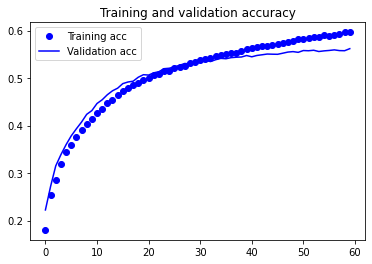

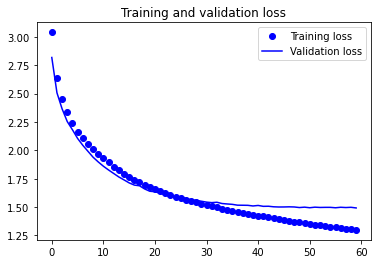

In [89]:
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [88]:
# Save the Model
model.save('character_generator_model_1.h5')

# Step 3 – Use the developed Model to generate the characters / sentences

In [22]:
# takes the user input
text_input = np.array([input()])

this day is a beautiful day, and no one is going to ruin it!


In [23]:
# encode the user input and use the Best Model to generate 400 characters

# Load the model
model = keras.models.load_model('character_generator_model_1.h5')

generated_text_initial = text_input[0]
print('--- Generating with seed: "' + generated_text_initial + '"')

for temperature in [0.5]:
    generated_text = generated_text_initial
    print('------ temperature:', temperature)
    sys.stdout.write(generated_text)

    # We generate 400 characters
    for i in range(400):
        sampled = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(generated_text):
            sampled[0, t, char_indices[char]] = 1.

        preds = model.predict(sampled, verbose=0)[0] # to get the softmax output
        next_index = sample(preds, temperature)
        next_char = chars[next_index]

        generated_text += next_char
        generated_text = generated_text[1:]

        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()

--- Generating with seed: "this day is a beautiful day, and no one is going to ruin it!"
------ temperature: 0.5
this day is a beautiful day, and no one is going to ruin it! 
"“but not something might, you’ve got it might it, you "
"an’ther,” said ron. “while you wouldn’t know what "
"while i’m looking for a cran hampy, he’d not to atk "
"hermione professor mcgonagall asked, they streed "
"outside the strains on her manage, they was could "
"something he’d back to staring the car, and harry "
"was stranger to the tipe they was a marge the fat, "
"“while may,” said ha
